# Lab 6 - Image matching via local feature detection

The goal of this lab is to experiment with image matching via local feature detection.

## Goal: Image matching using local features

In this notebook, I have provided code for 1) corner detection and 2) SIFT feature computation.  You will be using SIFT features to compute a match score between two images.  Details are provided below.

Please __Submit via Blackboard__.

In [27]:
import cv2
import numpy as np
from scipy.spatial import distance as d
from numpy import linalg as la
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

### Test Image

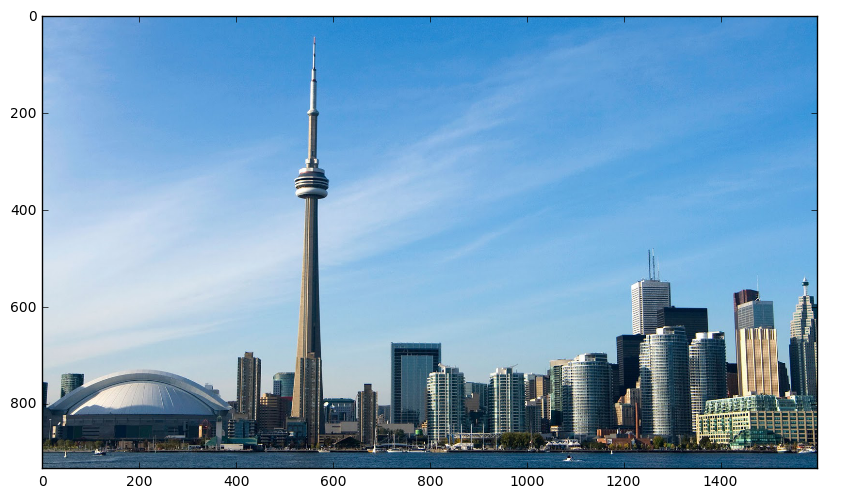

In [2]:
img_file = 'cn-tower-1.jpg'
#img_file = 'cb.png'

img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

### Finding interest points using Harris Corner Detector

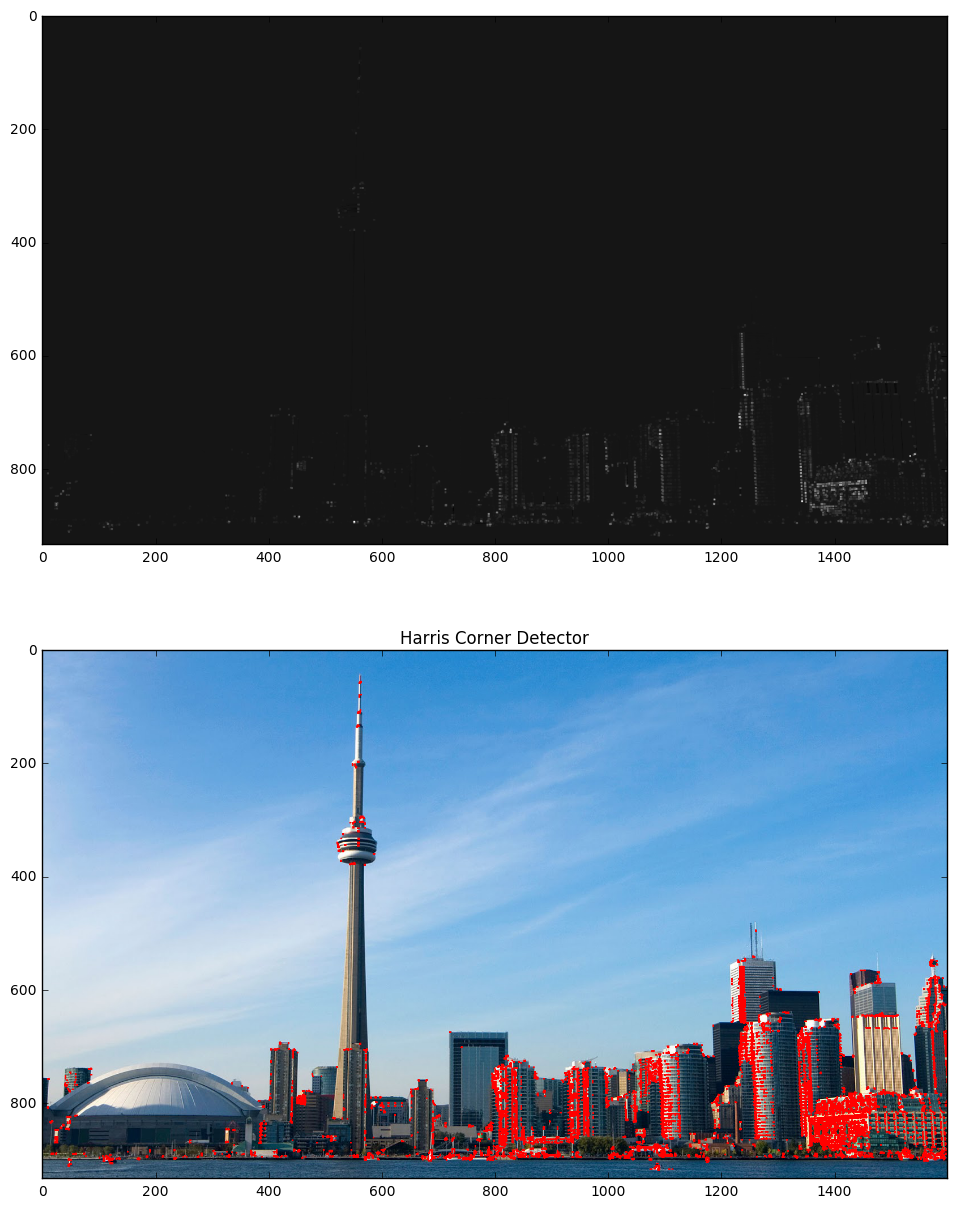

In [3]:
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
src = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
src = np.float32(src)

blocksize = 2 # size of the neighbourhood considered for corner detection
ksize = 3 # size of the Sobel kernel (a.k.a. the aperture parameter of the Sobel derivative)
k = 0.04 # Harris detector parameter used in the corner response equation $R = det(M) - k (trace(M))^2$
dst = cv2.cornerHarris(src, blocksize, ksize, k)
dst = cv2.dilate(dst, None)
img[dst>0.01*dst.max()]=[255,0,0]

plt.figure(figsize=(20,15))
plt.title('Harris Corner Response')
plt.subplot(2,1,1)
plt.imshow(dst, cmap='gray')
plt.subplot(2,1,2)
plt.title('Harris Corner Detector')
plt.imshow(img)

### Finding interest points using Shi-Tomasi Corner Detector

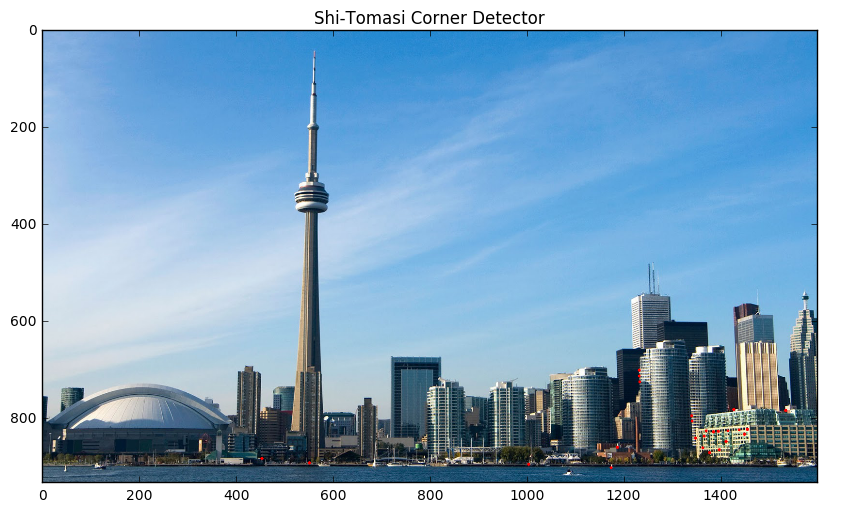

In [4]:
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
src = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

corners = cv2.goodFeaturesToTrack(src, 25, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.figure(figsize=(10,10))
plt.title('Shi-Tomasi Corner Detector')
plt.imshow(img)

### SIFT

The following code identifies the locations (stored as cv2.Keypoint) that are suitable for SIFT computation.  An orientation and scale is associated with each location.

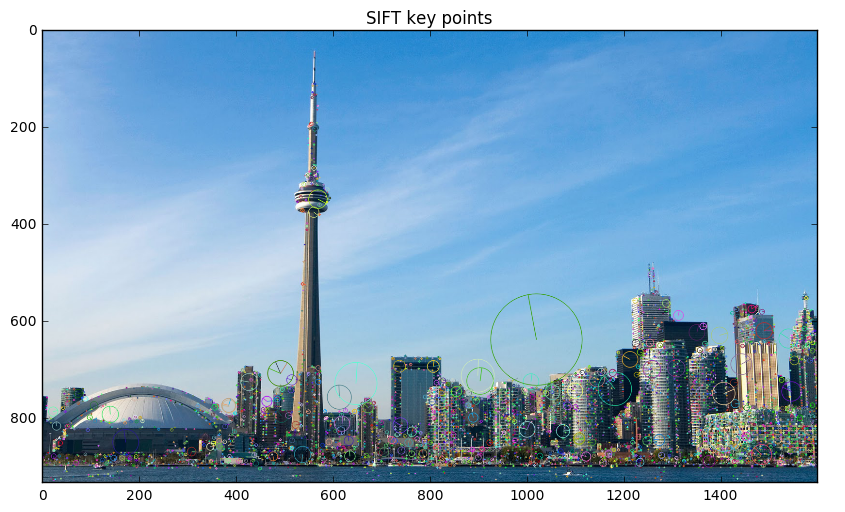

In [13]:
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
src = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()
src = np.uint8(src)
kp = sift.detect(src, None)

# Given these keypoints we are able to compute the SIFT descriptors
# at these keypoints as follows
#
# Below des is a (n x 128) numpy array, whose each row contains a SIFT
# descriptor
kp, des = sift.compute(src, kp)

# We draw the keypoint alongwith their scale and orientation
# for better visualization
dummy = np.zeros((1,1))
src = cv2.drawKeypoints(img, kp, dummy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.title('SIFT key points')
plt.imshow(src)

### TODO

Your goal is to use local feature descriptors computed from two images to compute a match score for these images.  Here's the a recipie for computing a match score.

1. Compute $n$ SIFT descriptors from image 1
2. Compute $m$ SIFT descriptors from image 2
3. _Each descriptor is a 128-dimenstional vector.  So find a scheme to compute distance between two vectors---say, Euclidean distance.  Also identify a suitable threshold that you can use to decide if two vectors are "matched._
 Now using the distance computating above, find the number of matched vectors between the vectors computed from image 1 and those computed from image 2.  
4. Find the percentage of matched vectors w.r.t. to the the number of vectors computed from the image 1 or image 2.  Use image 1 number, if $n$ is smaller than $m$, image 2 numbers otherwise.

__Complete the following function__ which returns a number between 0.0 and 1.0

In [69]:
def img_match(filename1, filename2):
    sift = cv2.xfeatures2d.SIFT_create()
    img1 = cv2.imread(filename1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.imread(filename2)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    src1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    src1 = np.uint8(src1)
    src2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    src2 = np.uint8(src2)
    kp1 = sift.detect(src1, None)
    kp2 = sift.detect(src2, None)
    kp1, des1 = sift.compute(src1, kp1)
    kp2, des2 = sift.compute(src2, kp2)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    good = []
    for m,n in matches:
        if m.distance < 0.90*n.distance:
            good.append([m])
            
    if(len(kp1) < len(kp2)):
        num_points = len(kp1)
    else:
        num_points = len(kp2)
    
    #successes = 0;
    #for i in range(num_points):
    #    e_dist = d.euclidean(des1[:][i], des2[:][i]) #la.norm(des1[:num_points]-des2[:num_points])
    #    if(e_dist < 500):
    #        successes = successes + 1
    #    #print(e_dist)
    
    return len(good)/num_points

We will use this function as follows

In [70]:
filename1 = 'cn-tower-1.jpg'
filename2 = 'cn-tower-2.jpg'

print('Match score is', img_match(filename1, filename2))

Match score is 0.599758162031439
